# Jupyter notebook title, modify me!


Variables used by other parts of this autogenerated notebook - Don't modify if you don't know what you are doing!)

Description : fileName variable, indicates the name of the document to save

In [1]:
fileName='test.ipynb'

Description : resultDatasetParents variable, indicates the permIds of the parents of the result dataset

In [2]:
resultDatasetParents=["20190328133056219-504"]

Description : history identifier, different versions of the same notebook should share the same identifier to keep the history

In [3]:
resultDatasetHistoryId='f7f4a277-1f94-58f1-dc64-9b5a63bc72c7'

Description : resultDatasetName variable, indicates the name of the result dataset, **to be set by the user**

In [5]:
resultDatasetName='My first analysis'

Description : resultDatasetNotes variable, indicate some notes of the result dataset, **to be set by the user**

In [6]:
resultDatasetNotes='analysis notes'

## Connect to openBIS

In [9]:
import getpass
from pybis import Openbis

user = 'hluetcke'
password = getpass.getpass()
o = Openbis()
o.login(user, password)

········
Session is no longer valid. Please log in again.


'hluetcke-190618104532920x9CF63759FD4F1AE6998846633A352C4A'

## Datasets Information

Dataset 20190328133056219-504 Owner:

In [10]:
s0 = o.get_object('20190328133015176-503')
s0

attribute,value
code,JUPYTER-DEMO
permId,20190328133015176-503
identifier,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
type,EXPERIMENTAL_STEP
project,/SIS_HLUETCKE/DEMO
parents,[]
children,[]
components,[]
space,SIS_HLUETCKE
experiment,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO


Dataset 20190328133056219-504:

In [11]:
ds0 = o.get_dataset('20190328133056219-504')
ds0.attrs

attribute,value
code,20190328133056219-504
permId,20190328133056219-504
type,RAW_DATA
experiment,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
sample,/SIS_HLUETCKE/DEMO/JUPYTER-DEMO
parents,[]
children,[]
components,
tags,[]
accessDate,2019-06-18 10:37:22


In [12]:
ds0.get_files(start_folder="/")

,isDirectory,pathInDataSet,fileSize,crc32Checksum
0,True,original,-1,0
1,False,original/blobs.tif,65172,a988a199


## Datasets Download

In [13]:
ds0.download(files=ds0.file_list, destination='./', wait_until_finished=True)

Files downloaded to: ./20190328133056219-504


'./'

## Process your data here

### Import required modules

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import reconstruction, remove_small_objects
from skimage.measure import label, regionprops

%matplotlib inline

### Read and display the data

In [16]:
img = imread('./20190328133056219-504/original/blobs.tif')

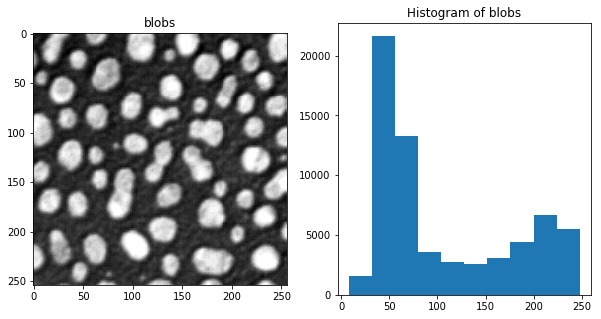

In [17]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(img, cmap='gray')
plt.title('blobs')
fig.add_subplot(122)
plt.hist(img.ravel(), bins=10)
plt.title('Histogram of blobs')
plt.show()

### Process the data
Let's say our analysis task is to segement the white blobs from the dark background. We will first set a threshold to binarize the image. Then we perform some further image processing to refine the results. Finally, we label the segmented blobs and measure their size.

In [18]:
intensity_threshold = 150
binary = img > intensity_threshold

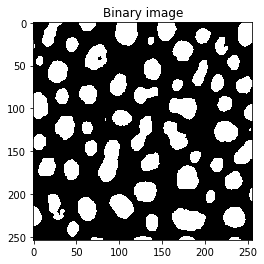

In [27]:
plt.imshow(binary, cmap='gray')
plt.title('Binary image');

Fill the small holes in the white blobs.

In [20]:
seed = np.copy(binary)
seed[1:-1, 1:-1] = binary.max()
filled = reconstruction(seed, binary, method='erosion')

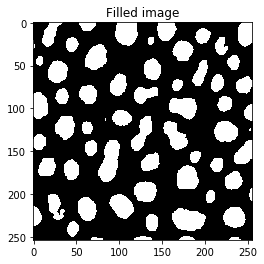

In [26]:
plt.imshow(filled, cmap='gray')
plt.title('Filled image');

Remove some small, spurious blobs.

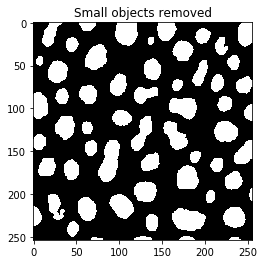

In [25]:
removed_small = remove_small_objects(filled.astype(bool), min_size=20)

plt.imshow(removed_small, cmap='gray')
plt.title('Small objects removed');

Label the objects found.

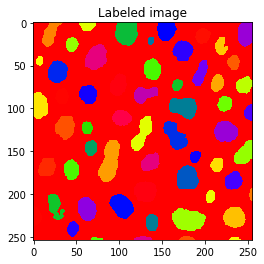

In [23]:
label_img = label(removed_small, connectivity=img.ndim)

plt.imshow(label_img*10, cmap='prism')
plt.title('Labeled image');

Get properties of the detected objects.

In [24]:
props = regionprops(label_img)
area = np.array([x.area for x in props])

print('Found %d blobs.' % (len(area)))
print('Area min: %1.0f pixels' % (np.min(area)))
print('Area max: %1.0f pixels' % (np.max(area)))
print('Area mean: %1.0f pixels' % (np.mean(area)))

Found 59 blobs.
Area min: 34 pixels
Area max: 820 pixels
Area mean: 333 pixels


Congratulations, you are done! Do not forget to save the notebook (`File --> Save and Checkpoint`) or download it to your computer (`File --> Download as --> Notebook`). Afterwards you can run the following code lines to store the notebook back into openBIS.

## Saving the results

The next cell stores a copy of this notebook as an html file so it can be open easily in browsers without the need of Jupyter, **save before executing this to get the lattest version as html**

In [28]:
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read(fileName, as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(fileName + '.html', 'w', encoding='utf-8').write(output)


Sets the owner of the result dataset

In [29]:
owner= o.get_object('/SIS_HLUETCKE/DEMO/JUPYTER-DEMO'),
owner

(attribute    value
 -----------  -------------------------------
 code         JUPYTER-DEMO
 permId       20190328133015176-503
 identifier   /SIS_HLUETCKE/DEMO/JUPYTER-DEMO
 type         EXPERIMENTAL_STEP
 project      /SIS_HLUETCKE/DEMO
 parents      []
 children     []
 components   []
 space        SIS_HLUETCKE
 experiment   /SIS_HLUETCKE/DEMO/JUPYTER-DEMO
 tags         [],)

Creates the result dataset

In [ ]:
ds_new = o.new_dataset(
type='ANALYZED_DATA',
sample= o.get_object('/SIS_HLUETCKE/DEMO/JUPYTER-DEMO'),
parents=resultDatasetParents,
files = [fileName, fileName + '.html'],
props={'name': resultDatasetName, 'notes': resultDatasetNotes, 'history_id' : resultDatasetHistoryId })
ds_new.save()